# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
中外薬
キーエンス
ＮＴＴ
任天堂
三井住友ＦＧ
ＫＤＤＩ
リクルート
伊藤忠
ＳＢ
三菱商
東京海上
ＳＢＧ
東エレク
三菱重
ＪＴ
みずほＦＧ
三井物
信越化
ホンダ
武田
第一三共
富士通
ＯＬＣ
キヤノン
ＨＯＹＡ
['7203', '6758', '8306', '6501', '9983', '4519', '6861', '9432', '7974', '8316', '9433', '6098', '8001', '9434', '8058', '8766', '9984', '8035', '7011', '2914', '8411', '8031', '4063', '7267', '4502', '4568', '6702', '4661', '7751', '7741']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,8411,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992379,...,0.992525,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.978256,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.986410,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,1.000426,0.973799,0.994573,0.989588,0.982036,...,0.960362,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.965904,0.945819,0.981683,0.923372,0.946856,...,0.917554,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.964342,0.936115,0.980326,0.932049,0.934132,...,0.917101,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935502,0.935145,0.968114,0.951685,0.918413,...,0.908494,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.941611,0.898916,0.966757,0.920632,0.847804,...,0.836240,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.945305,0.884522,0.977612,0.911225,0.779691,...,0.742242,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [7]:
summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,8411,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992379,...,0.992525,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.978256,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.986410,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,1.000426,0.973799,0.994573,0.989588,0.982036,...,0.960362,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.965904,0.945819,0.981683,0.923372,0.946856,...,0.917554,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.964342,0.936115,0.980326,0.932049,0.934132,...,0.917101,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935502,0.935145,0.968114,0.951685,0.918413,...,0.908494,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.941611,0.898916,0.966757,0.920632,0.847804,...,0.836240,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.945305,0.884522,0.977612,0.911225,0.779691,...,0.742242,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [8]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.164086
9433    1.058679
2914    1.057725
9432    1.019674
9434    1.018815
4661    1.010645
9983    1.000000
7267    0.997539
7011    0.994731
8001    0.987827
4502    0.969561
8058    0.954215
6702    0.952396
7974    0.951228
6861    0.950186
6501    0.941680
7203    0.929278
8031    0.921088
6758    0.918224
7741    0.905906
4568    0.886971
8766    0.885144
8035    0.881561
7751    0.876310
9984    0.850375
6098    0.850314
4063    0.847359
8316    0.798403
8306    0.774616
8411    0.765798
Name: 2025-04-23 00:00:00, dtype: float64

In [9]:
list_ranking = df_ranking.index[0:7]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-21    1.196193
2025-04-22    1.180992
2025-04-23    1.164086
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-21    1.040213
2025-04-22    1.054780
2025-04-23    1.058679
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-21    1.015569
2025-04-22    1.020838
2025-04-23    1.057725
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-21    1.007463
2025-04-22    1.016961
2025-04-23    1.019674
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-21    1.007996
2025-04-22    1.011759
2025-04-23    1.018815
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-21    1.006129
2025-04-22    1.007742
2025-04-23    1.010645
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-21    0.994624
2025-04-22    0.987957
2025-04-23    1.000000
Name: Close, dtype: float64

Median
2025-04-21    0.902038
2025-04-22    0.909500
2025-04-23    0.945933
dtype: float64


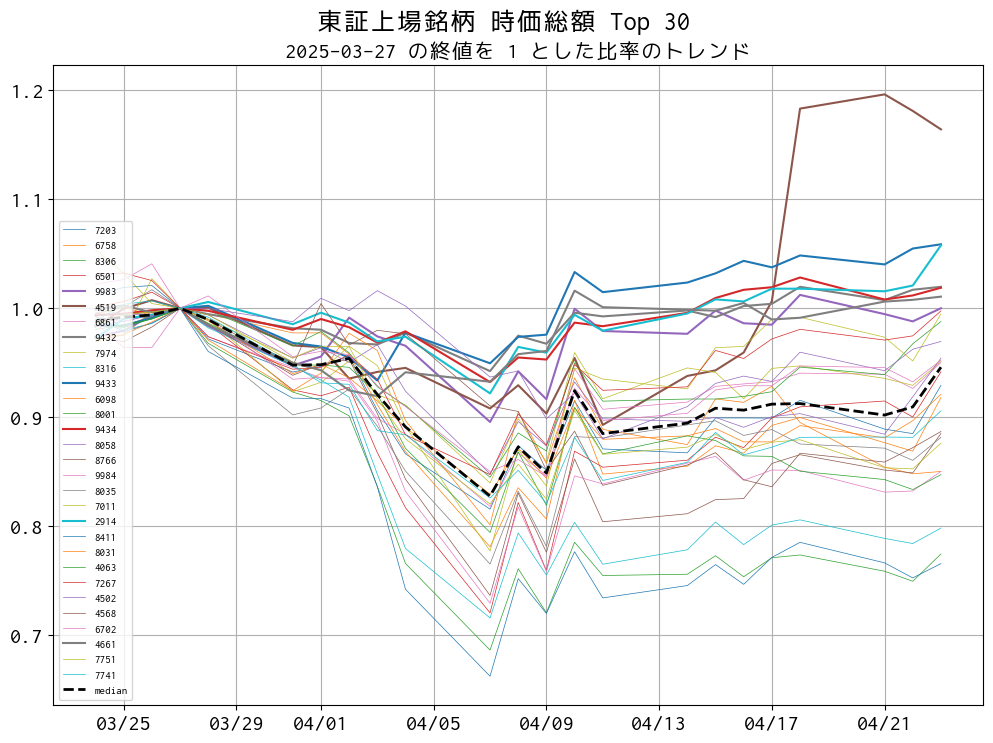

In [10]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [11]:
summary.median(axis=1)

2025-03-24    0.988628
2025-03-25    0.991767
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989657
2025-03-31    0.947801
2025-04-01    0.948237
2025-04-02    0.953953
2025-04-03    0.920925
2025-04-04    0.891153
2025-04-07    0.827678
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.885028
2025-04-14    0.894629
2025-04-15    0.908320
2025-04-16    0.906548
2025-04-17    0.912041
2025-04-18    0.912590
2025-04-21    0.902038
2025-04-22    0.909500
2025-04-23    0.945933
dtype: float64